In [39]:
import pandas as pd
import os, sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 18})

## Create synthetic signal
dt = 0.001
t = np.arange(0, 1, dt)
signal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #composite signal
signal_clean = signal #copy for later comparison
signal = signal + 2.5 * np.random.randn(len(t))
minsignal, maxsignal = signal.min(), signal.max()
plt.show()
plt.show()
'''
We created our signal by summing two sine functions different frequencies (50Hz and 120Hz).
Then we created an array of random noise and stacked that noise onto the signal.
'''

'\nWe created our signal by summing two sine functions different frequencies (50Hz and 120Hz).\nThen we created an array of random noise and stacked that noise onto the signal.\n'

In [40]:
## Compute Fourier Transform
n = len(t)
fhat = np.fft.fft(signal, n) #computes the fft
psd = fhat * np.conj(fhat)/n
freq = (1/(dt*n)) * np.arange(n) #frequency array
idxs_half = np.arange(1, np.floor(n/2), dtype=np.int32) #first half index
'''
Numpy’s fft.fft function returns the one-dimensional discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm.
The output of the function is complex and we multiplied it with its conjugate to obtain the power spectrum of the noisy signal.
We created the array of frequencies using the sampling interval (dt) and the number of samples (n).
'''

'\nNumpy’s fft.fft function returns the one-dimensional discrete Fourier Transform with the efficient Fast Fourier Transform (FFT) algorithm.\nThe output of the function is complex and we multiplied it with its conjugate to obtain the power spectrum of the noisy signal.\nWe created the array of frequencies using the sampling interval (dt) and the number of samples (n).\n'

In [41]:
## Filter out noise
threshold = 100
psd_idxs = psd > threshold #array of 0 and 1
psd_clean = psd * psd_idxs #zero out all the unnecessary powers
fhat_clean = psd_idxs * fhat #used to retrieve the signal

signal_filtered = np.fft.ifft(fhat_clean) #inverse fourier transform

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


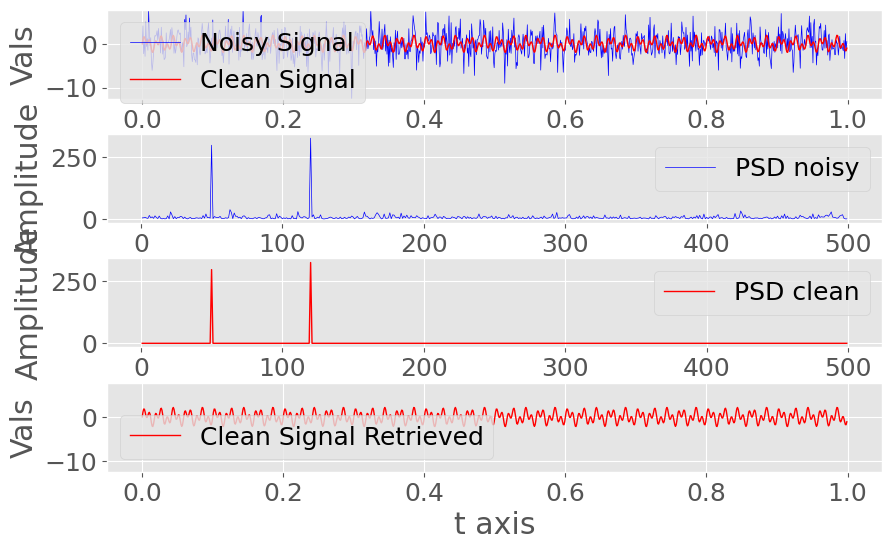

In [42]:
## Visualization
fig, ax = plt.subplots(4,1)
ax[0].plot(t, signal, color='b', lw=0.5, label='Noisy Signal')
ax[0].plot(t, signal_clean, color='r', lw=1, label='Clean Signal')
ax[0].set_ylim([minsignal, maxsignal])
ax[0].set_xlabel('t axis')
ax[0].set_ylabel('Vals')
ax[0].legend()

ax[1].plot(freq[idxs_half], np.abs(psd[idxs_half]), color='b', lw=0.5, label='PSD noisy')
ax[1].set_xlabel('Frequencies in Hz')
ax[1].set_ylabel('Amplitude')
ax[1].legend()

ax[2].plot(freq[idxs_half], np.abs(psd_clean[idxs_half]), color='r', lw=1, label='PSD clean')
ax[2].set_xlabel('Frequencies in Hz')
ax[2].set_ylabel('Amplitude')
ax[2].legend()

ax[3].plot(t, signal_filtered, color='r', lw=1, label='Clean Signal Retrieved')
ax[3].set_ylim([minsignal, maxsignal])
ax[3].set_xlabel('t axis')
ax[3].set_ylabel('Vals')
ax[3].legend()


plt.subplots_adjust(hspace=0.4)
plt.savefig('signal-analysis.png', bbox_inches='tight', dpi=300)

In [43]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

AttributeError: 'Axes' object has no attribute 'rcParams'

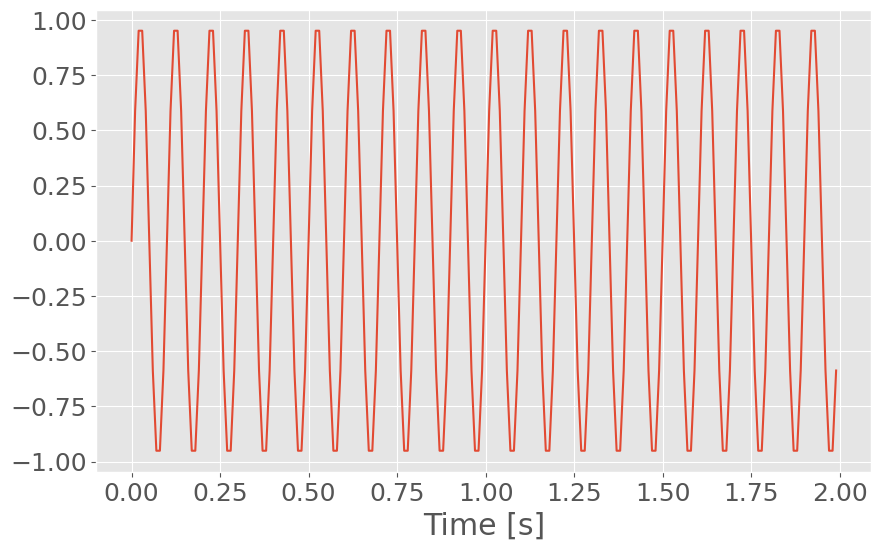

In [44]:
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.rcParams['figure.figsize'] = [24, 24]
ax.set_xlim([0,2])
ax.set_ylabel('Signal amplitude')
ax.grid(True)

AttributeError: 'Axes' object has no attribute 'rcParams'

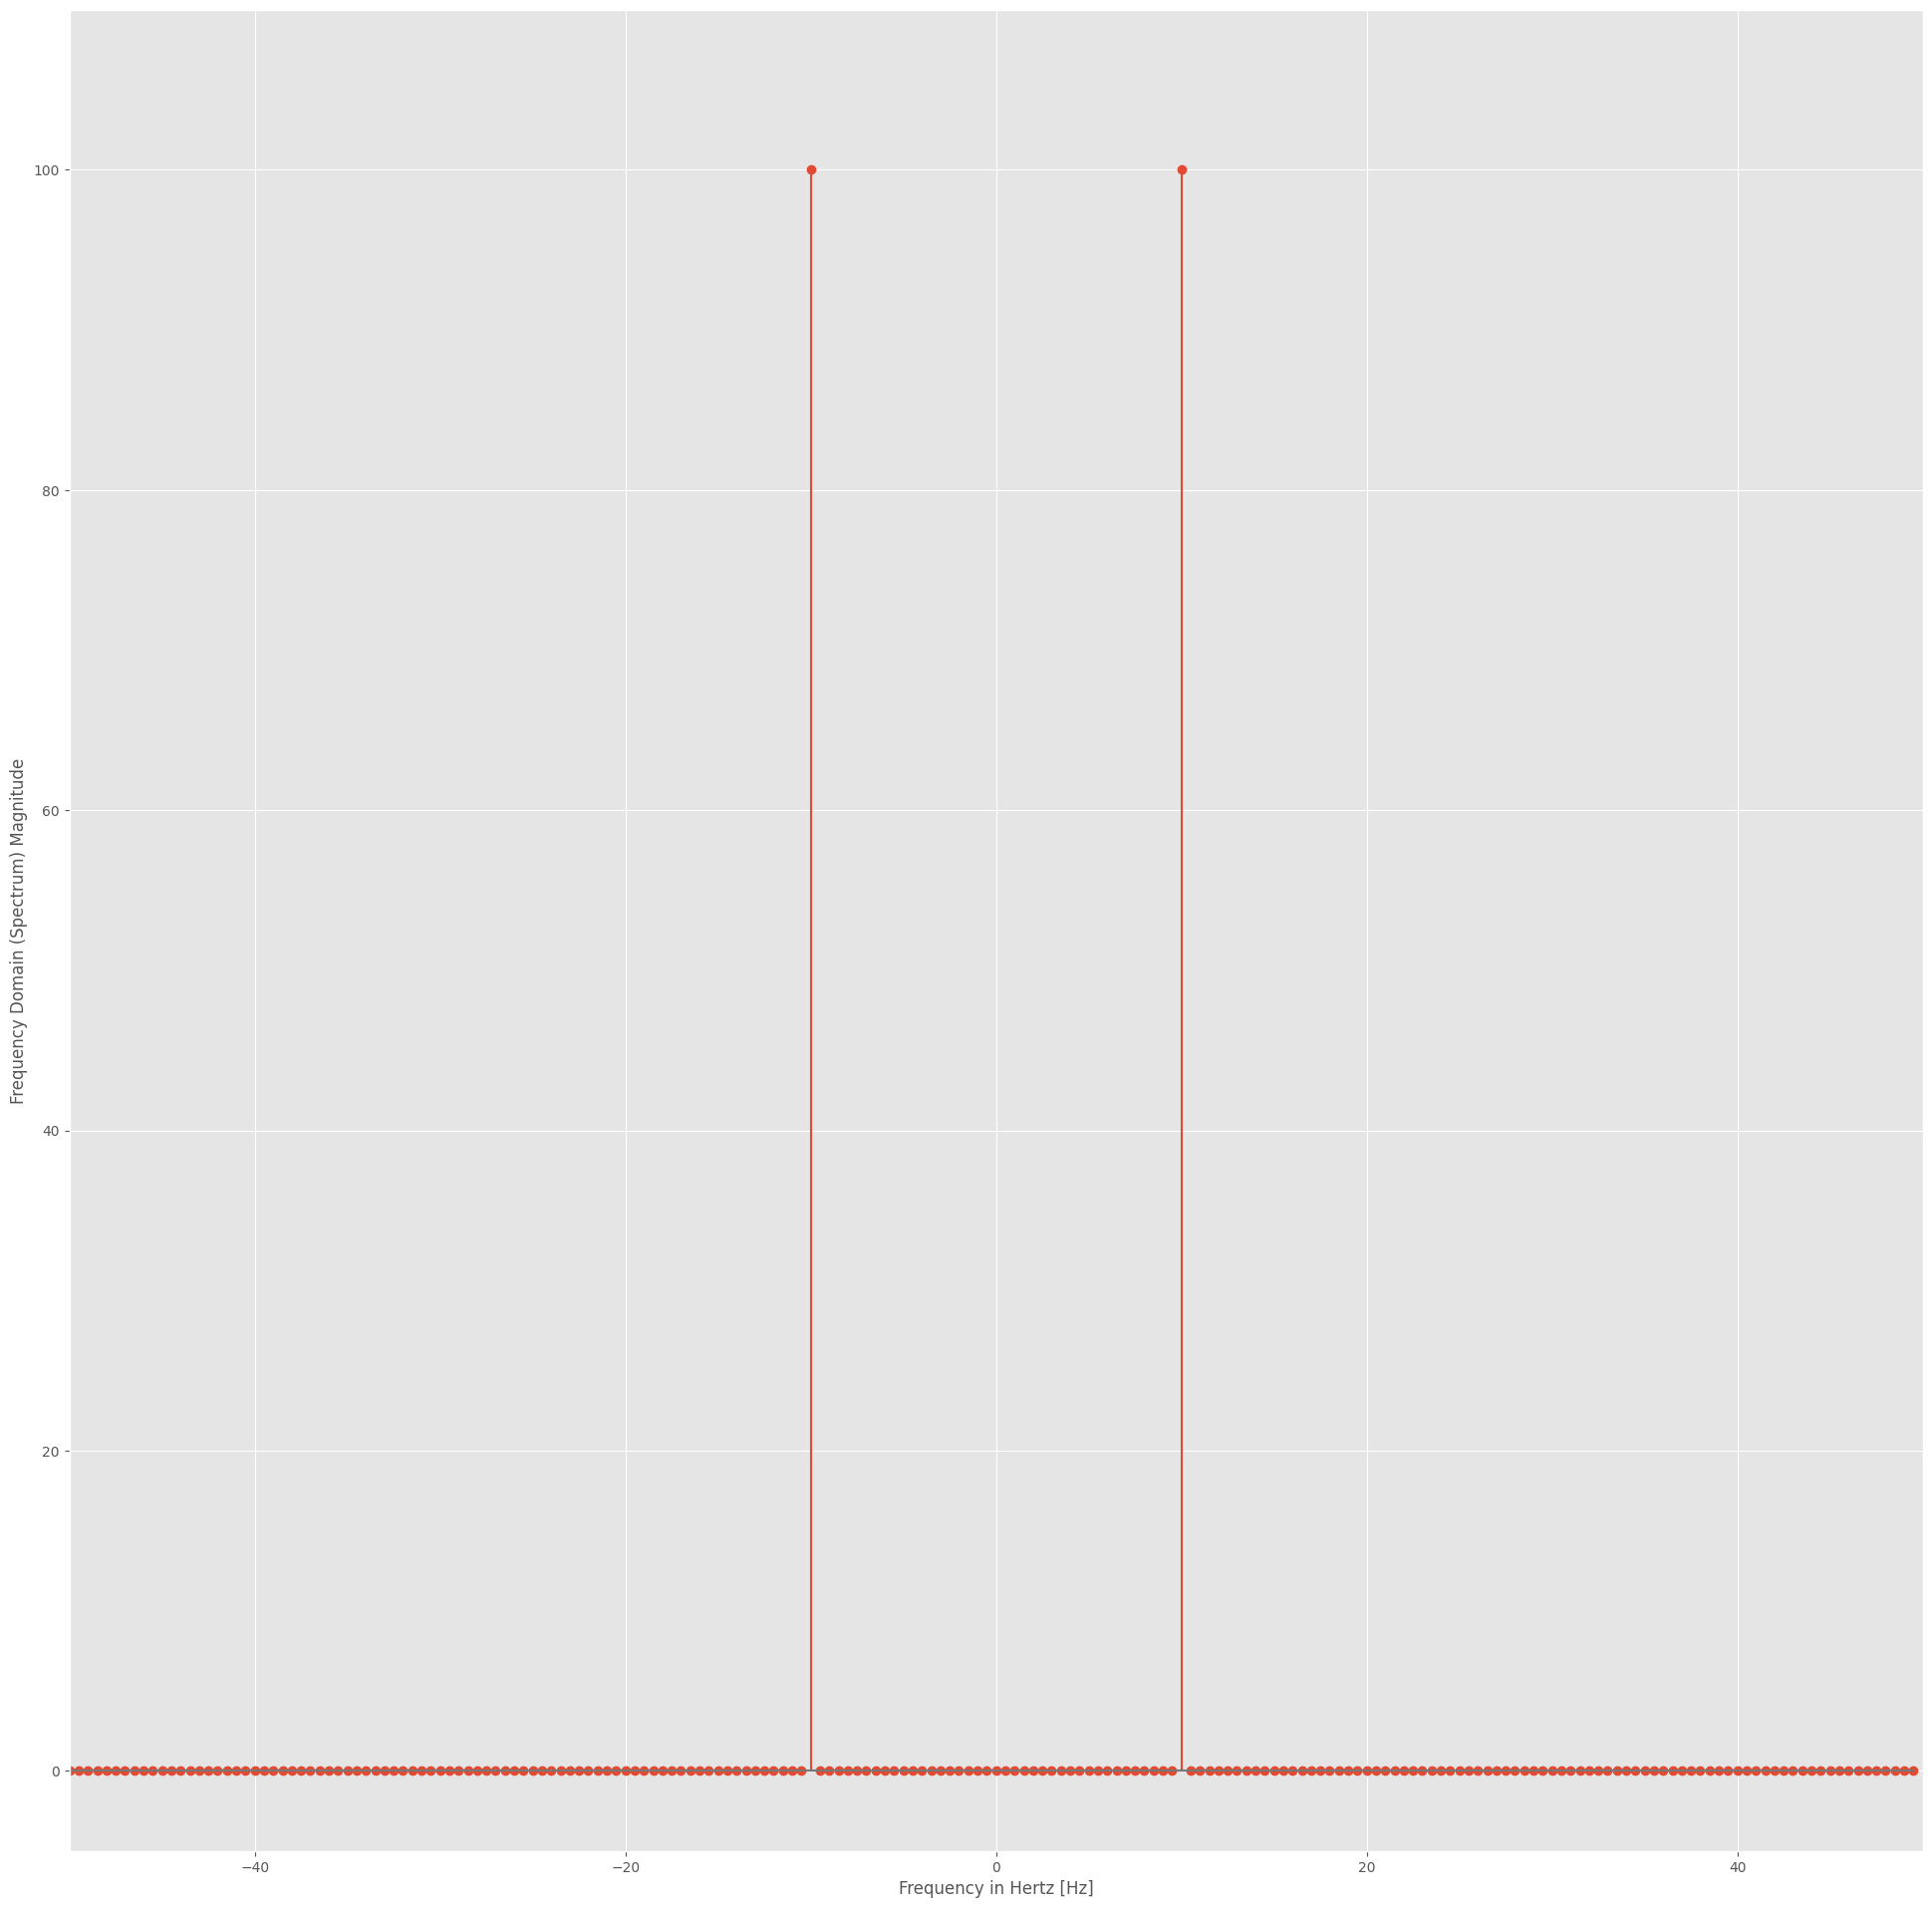

In [32]:
from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)
ax.rcParams['figure.figsize'] = [24, 24]
ax.grid(True)

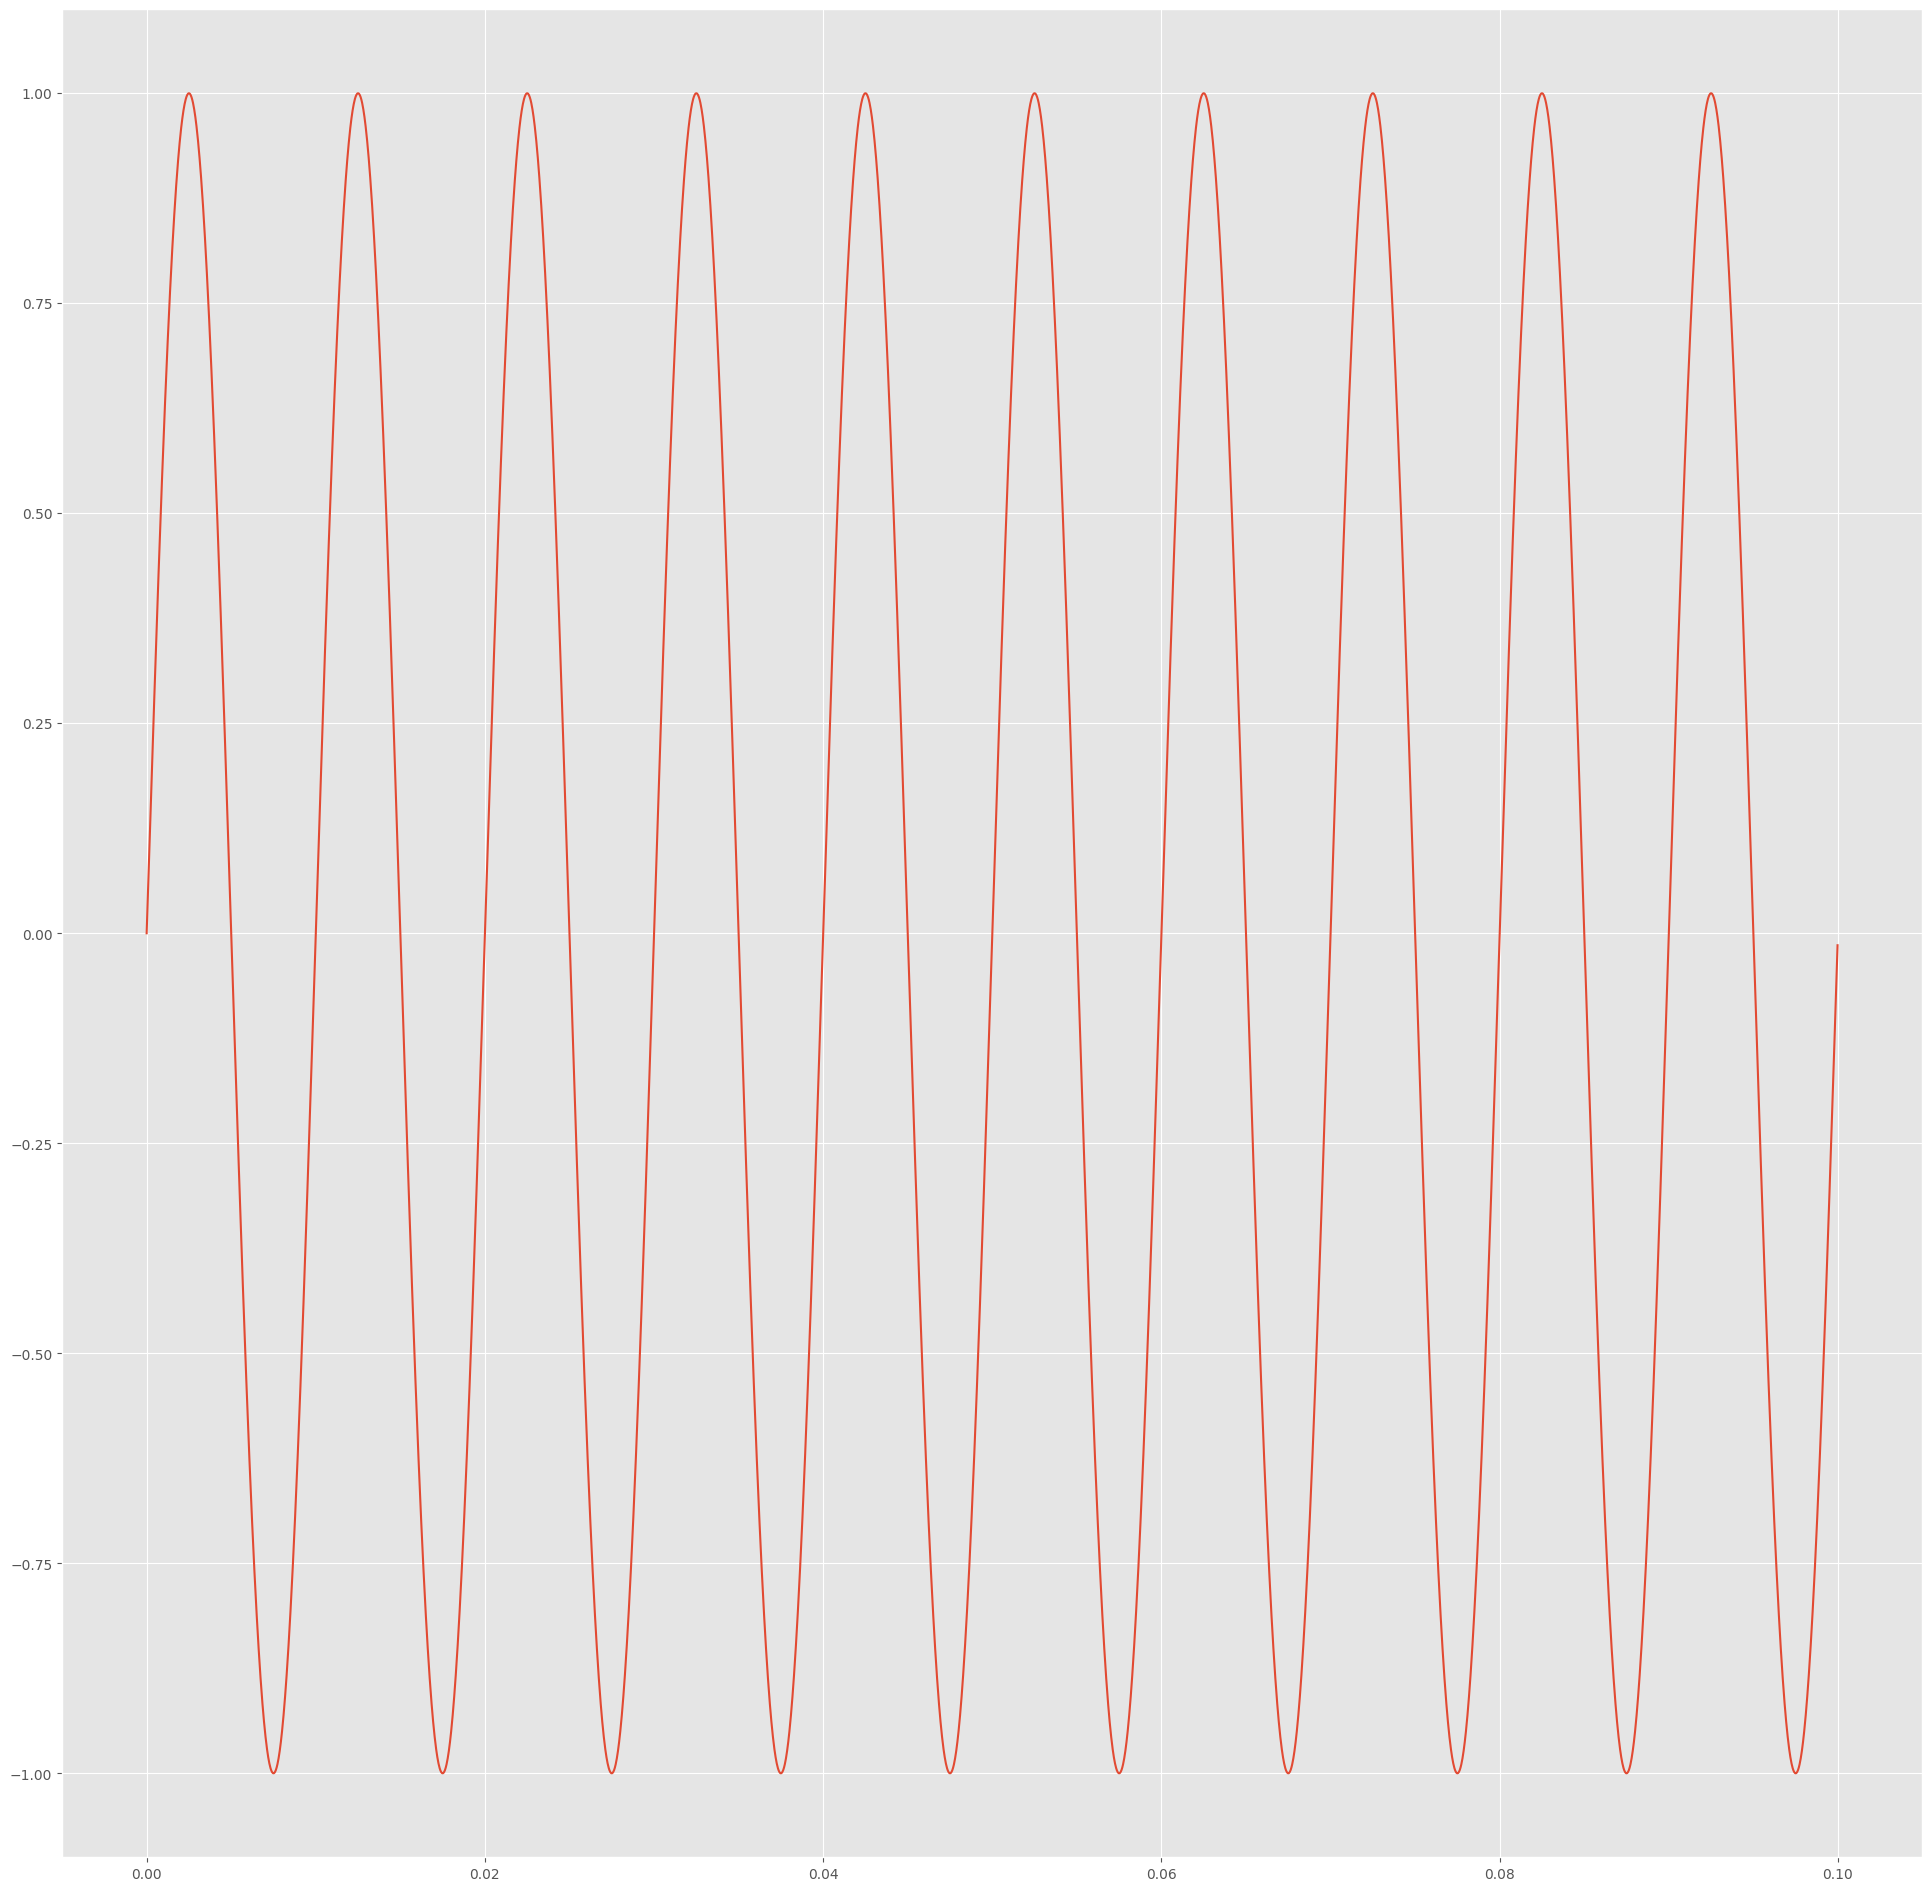

In [45]:
# nNOISE EXTRACTION FFT 
# sampling a sine wave programmatically
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# sampling information
Fs = 44100 # sample rate
T = 1/Fs # sampling period
t = 0.1 # seconds of sampling
N = Fs*t # total points in signal

# signal information
freq = 100 # in hertz, the desired natural frequency
omega = 2*np.pi*freq # angular frequency for sine waves

t_vec = np.arange(N)*T # time vector for plotting
y = np.sin(omega*t_vec)
plt.rcParams['figure.figsize'] = [24, 24]
plt.plot(t_vec,y)
plt.show()


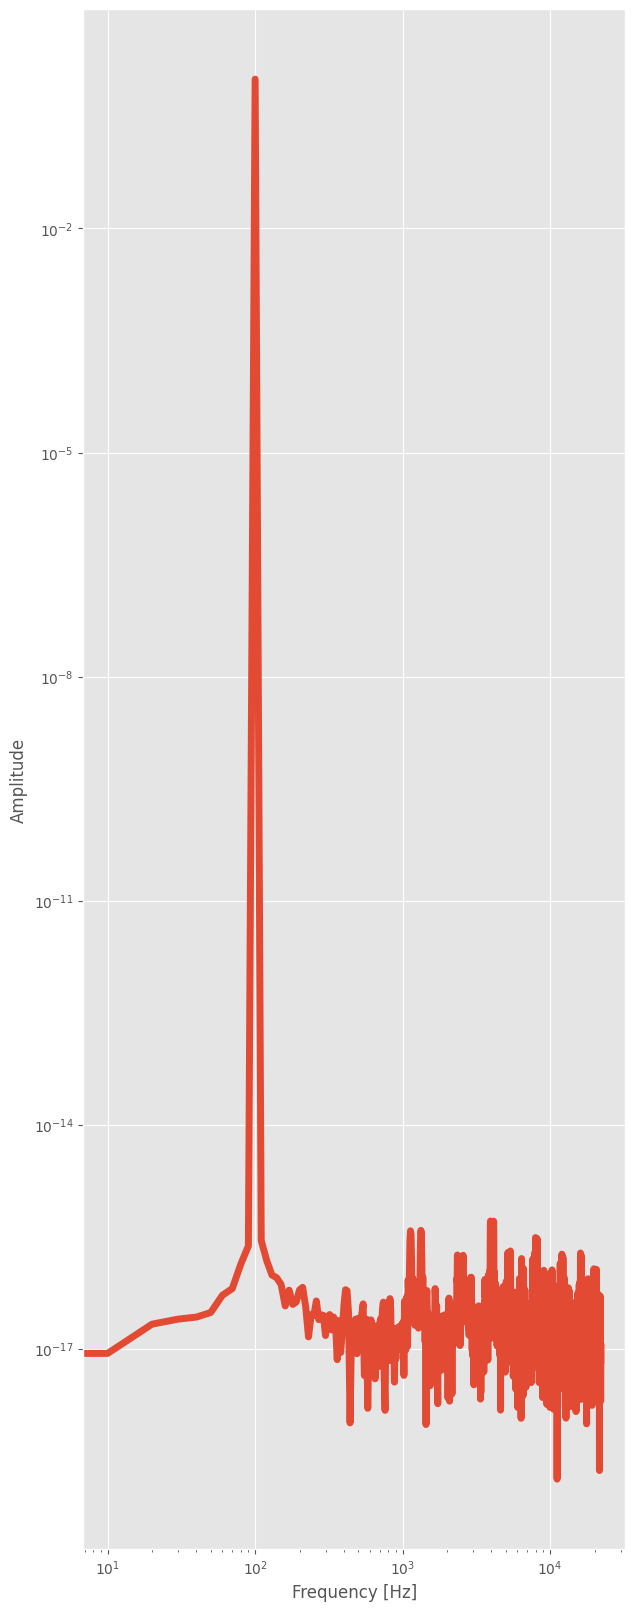

In [50]:
# fourier transform and frequency domain
#
Y_k = np.fft.fft(y)[0:int(N/2)]/N # FFT function from numpy
Y_k[1:] = 2*Y_k[1:] # need to take the single-sided spectrum only
Pxx = np.abs(Y_k) # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N; # frequency vector

# plotting
fig,ax = plt.subplots()
plt.plot(f,Pxx,linewidth=5)
plt.rcParams['figure.figsize'] = [20, 9]
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()